In [1]:
# Mounting google drive

# Downloading all the required libraries


# Importing all the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import style
from glob import glob
style.use('ggplot')

In [2]:
home='E:/ML/ES-335-Fall-2024-Assignment-4/dataset/home/'
train='E:/ML/ES-335-Fall-2024-Assignment-4/dataset/train/'
test='E:/ML/ES-335-Fall-2024-Assignment-4/dataset/test/'

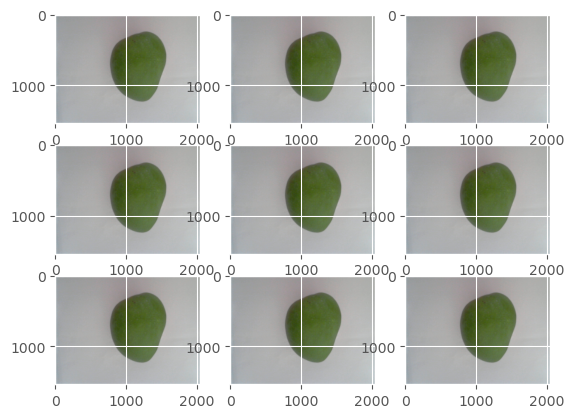

In [3]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = home
# plot first few images
cnt=1
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'mango' + str(cnt) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

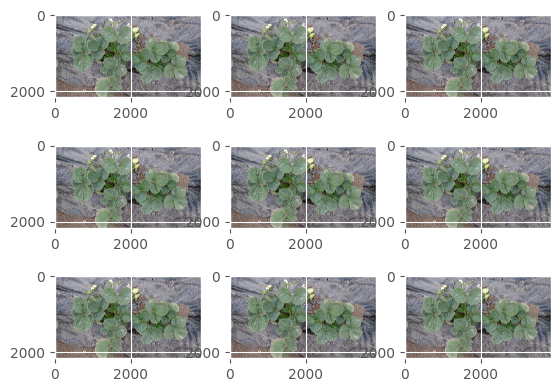

In [4]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = home
cnt=1
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'strawberry' + str(cnt) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [25]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = home
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('mango'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(224, 224))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('mango_vs_strawberry_photos.npy', photos)
save('mango_vs_strawberry_labels.npy', labels)

(200, 224, 224, 3) (200,)


In [3]:
# load and confirm the shape
from numpy import load
photos = load('mango_vs_strawberry_photos.npy')
labels = load('mango_vs_strawberry_labels.npy')
print(photos.shape, labels.shape)

(200, 224, 224, 3) (200,)


In [4]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

In [7]:
# create directories
# dataset_home = 'dataset_dogs_vs_cats/'
subdirs = [train, test]
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['mangoes/', 'strawberries/']
	for labldir in labeldirs:
		newdir = subdir + labldir
		makedirs(newdir, exist_ok=True)

In [8]:
import shutil
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.20
# copy training dataset images into subdirectories
src_directory = home
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = train
	if random() < val_ratio:
		dst_dir = test
	if file.startswith('mango'):
		dst = dst_dir + 'mangoes/'  + file
		copyfile(src, dst)
	elif file.startswith('strawberry'): 
		dst = dst_dir + 'strawberries/' + file  
		copyfile(src, dst)

In [10]:
# 

In [5]:

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [7]:
# prepare iterators
train_it = datagen.flow_from_directory(train,
	class_mode='binary', batch_size=10, target_size=(224, 224))
test_it = datagen.flow_from_directory(test,
	class_mode='binary', batch_size=5, target_size=(224, 224))

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
# #baseline cnn model
# # define cnn model
# def define_cnn_model():
# 	model = Sequential()
# 	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
# 	model.add(MaxPooling2D((2, 2)))
# 	model.add(Flatten())
# 	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# 	model.add(Dense(1, activation='sigmoid'))
# 	# compile model
# 	opt = SGD(learning_rate=0.01, momentum=0.9)
# 	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# 	return model

In [8]:
def fit(model):
    history = model.fit(train_it,	validation_data=test_it,  epochs=6, verbose=1)#1 epoch for testing
    # print(history.history["loss"])
    return history

In [9]:
def evaluate(model):
    _, test_acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
    print('> %.3f' % (test_acc * 100.0))
    return test_acc

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import time

# Define the VGG-like model
def define_vgg1_model():
    model = Sequential()
    
    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten layer converts the 3D outputs to 1D
    model.add(Flatten())
    
    # Dense fully connected layers
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    
    # Compile the model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [11]:
#two block vgg model
# define cnn model
def define_vgg2_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [12]:
#three block vgg model
# define cnn model
def define_vgg3_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [41]:
# import time


3.6.0
3.6.0


In [13]:
#vgg1 model
vgg1_start_time=time.time()
vgg1_model=define_vgg1_model()
vgg1_history=fit(vgg1_model)
vgg1_train_time=time.time()-vgg1_start_time

# vgg1_train_loss=vgg1_history.history["loss"]
# vgg1_train_acc=vgg1_history.history["accuracy"]
# vgg1_test_acc=evaluate(vgg1_model)

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6077 - loss: 12.3516 - val_accuracy: 0.6000 - val_loss: 0.7218
Epoch 2/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5560 - loss: 0.7626 - val_accuracy: 0.8250 - val_loss: 0.5441
Epoch 3/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5882 - loss: 0.7388 - val_accuracy: 0.4000 - val_loss: 0.7534
Epoch 4/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.6354 - loss: 0.5846 - val_accuracy: 1.0000 - val_loss: 0.3991
Epoch 5/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.9268 - loss: 0.3073 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 6/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 4.6343e-04


In [14]:
vgg1_train_loss=vgg1_history.history["loss"]
vgg1_train_acc=vgg1_history.history["accuracy"]
vgg1_test_acc=evaluate(vgg1_model)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 755ms/step - accuracy: 1.0000 - loss: 3.1976e-04
> 100.000


In [17]:
print(vgg1_train_loss)

[6.075203895568848, 0.7008260488510132, 0.6823083162307739, 0.5221132040023804, 0.22980988025665283, 0.0021808308083564043]


In [20]:
#vgg2 model
vgg2_start_time=time.time()
vgg2_model=define_vgg2_model()
vgg2_history=fit(vgg2_model)
vgg2_train_time=time.time()-vgg2_start_time

vgg2_train_loss=vgg2_history.history["loss"]
vgg2_train_acc=vgg2_history.history["accuracy"]
vgg2_test_acc=evaluate(vgg2_model)

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.5322 - loss: 2.6554 - val_accuracy: 0.8000 - val_loss: 0.3696
Epoch 2/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9595 - loss: 0.1380 - val_accuracy: 1.0000 - val_loss: 8.5025e-05
Epoch 3/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 1.0000 - loss: 8.0452e-05 - val_accuracy: 1.0000 - val_loss: 5.7001e-07
Epoch 4/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 1.0000 - loss: 1.7835e-06 - val_accuracy: 1.0000 - val_loss: 2.1695e-07
Epoch 5/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 1.2467e-06 - val_accuracy: 1.0000 - val_loss: 1.8211e-07
Epoch 6/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 2.4389e-06 - val_accuracy: 1.0000 - val_loss: 1.7621e-07
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 545ms/step - accuracy: 1.0000 - loss: 1.8774e-07
> 100.000


In [21]:
#vgg3 model
vgg3_start_time=time.time()
vgg3_model=define_vgg3_model()
vgg3_history=fit(vgg3_model)
vgg3_train_time=time.time()-vgg3_start_time

vgg3_train_loss=vgg3_history.history["loss"]
vgg3_train_acc=vgg3_history.history["accuracy"]
vgg3_test_acc=evaluate(vgg3_model)

Epoch 1/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.4850 - loss: 2.1676 - val_accuracy: 0.4000 - val_loss: 0.6821
Epoch 2/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7272 - loss: 0.5859 - val_accuracy: 1.0000 - val_loss: 0.3579
Epoch 3/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9932 - loss: 0.1816 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 4/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9706 - loss: 0.1237 - val_accuracy: 0.6000 - val_loss: 0.6703
Epoch 5/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5927 - loss: 0.9274 - val_accuracy: 0.4000 - val_loss: 0.8226
Epoch 6/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5987 - loss: 1.1553 - val_accuracy: 0.6000 - val_loss: 0.6924
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 502ms/step - accuracy: 0.6230 - loss: 0.6924
> 60.000


In [ ]:
#Part 2

In [22]:
import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [23]:
keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="vgg16",
)

<Functional name=vgg16, built=True>

In [24]:
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [25]:
import cv2
import numpy as np
import os

# Path to the folder with images
folder_path = 'E:/ML/ES-335-Fall-2024-Assignment-4/dataset/home/'

# Initialize variables to store the sum of pixel values in each channel
sum_r = 0
sum_g = 0
sum_b = 0
total_pixels = 0

# Loop through each image in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(folder_path, filename)
        image = cv2.imread(img_path)  # Read the image
        
        # Convert the image from BGR (OpenCV format) to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Get the sum of R, G, B channels separately
        sum_r += np.sum(image[:, :, 0])
        sum_g += np.sum(image[:, :, 1])
        sum_b += np.sum(image[:, :, 2])
        
        # Update total pixel count
        total_pixels += image.shape[0] * image.shape[1]

# Calculate mean values for each channel
mean_r = sum_r / total_pixels
mean_g = sum_g / total_pixels
mean_b = sum_b / total_pixels

# Output the mean values in 3x1 format
mean_rgb = np.array([mean_r, mean_g, mean_b]).reshape(3, 1)
print("Mean RGB values:\n", mean_rgb)


Mean RGB values:
 [[131.70756136]
 [136.07476167]
 [128.71301495]]


In [26]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# define cnn model
def define_transfer_vgg16_model():
	# load model
	base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in base_model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(base_model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=base_model.input, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# # run the test harness for evaluating a model
# def run_test_harness():
# 	# define model
# 	model = define_model()
# 	# create data generator
# 	#datagen = ImageDataGenerator(featurewise_center=True)
# 	datagen = ImageDataGenerator(
#     rescale=1./255,  # Normalize to [0, 1] range
#     featurewise_center=True)

# 	# specify imagenet mean values for centering
# 	datagen.mean = [131.70756136,136.07476167,128.71301495]
# 	# prepare iterator
# 	train_it = datagen.flow_from_directory('train/',
# 		class_mode='binary', batch_size=10, target_size=(224, 224))
# 	test_it = datagen.flow_from_directory('test/',
# 		class_mode='binary', batch_size=10, target_size=(224, 224))
# 	# fit model
# 	history = model.fit(train_it, validation_data=test_it, epochs=10, verbose=1)
# 	#history = model.fit(train_it, steps_per_epoch=len(train_it),
# 	#	validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
# 	# evaluate model
# 	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
# 	print('> %.3f' % (acc * 100.0))
# 	# learning curves
# 	summarize_diagnostics(history)

# entry point, run the test harness
# run_test_harness()

In [ ]:
# # run the test harness for evaluating a model
# # define model
# # create data generator
# #datagen = ImageDataGenerator(featurewise_center=True)
# datagen = ImageDataGenerator(
# rescale=1./255,  # Normalize to [0, 1] range
# featurewise_center=True)

# # specify imagenet mean values for centering
# datagen.mean = [131.70756136,136.07476167,128.71301495]
# # prepare iterator
# train_it = datagen.flow_from_directory('train/',
#     class_mode='binary', batch_size=10, target_size=(224, 224))
# test_it = datagen.flow_from_directory('test/',
#     class_mode='binary', batch_size=10, target_size=(224, 224))



# # # fit model
# # history = model.fit(train_it, validation_data=test_it, epochs=10, verbose=1)
# # #history = model.fit(train_it, steps_per_epoch=len(train_it),
# # #	validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
# # # evaluate model
# # _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
# # print('> %.3f' % (acc * 100.0))
# # learning curves
# # summarize_diagnostics(history)



In [27]:
#vgg16 model
transfer_vgg16_start_time=time.time()
transfer_vgg16_model=define_transfer_vgg16_model()
transfer_vgg16_history=fit(transfer_vgg16_model)
transfer_vgg16_train_time=time.time()-transfer_vgg16_start_time

transfer_vgg16_train_loss=transfer_vgg16_history.history["loss"]
transfer_vgg16_train_acc=transfer_vgg16_history.history["accuracy"]
transfer_vgg16_test_acc=evaluate(transfer_vgg16_model)

Epoch 1/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.6057 - loss: 1.9229 - val_accuracy: 1.0000 - val_loss: 2.7902e-05
Epoch 2/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 1.0000 - loss: 2.0423e-05 - val_accuracy: 1.0000 - val_loss: 5.3912e-06
Epoch 3/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 1.0000 - loss: 6.3458e-06 - val_accuracy: 1.0000 - val_loss: 1.1633e-05
Epoch 4/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 1.0000 - loss: 7.6484e-06 - val_accuracy: 1.0000 - val_loss: 1.2599e-05
Epoch 5/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 64s 4s/step - accuracy: 1.0000 - loss: 1.0396e-05 - val_accuracy: 1.0000 - val_loss: 1.1540e-05
Epoch 6/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 1.0000 - loss: 8.0386e-06 - val_accuracy: 1.0000 - val_loss: 1.0376e-05
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 1.0000 - loss: 6.4285e-06
> 100.000


In [28]:
# vgg16 model used for transfer learning on the mangoes and strawberries dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# define cnn model
def define_transfer_mlp_vgg16_model():
	# load model
	base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in base_model.layers:
		layer.trainable = True
	# add new classifier layers
	flat1 = Flatten()(base_model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=base_model.input, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
# def run_test_harness():
# 	# define model
# 	model = define_model()
# 	# create data generator
# 	#datagen = ImageDataGenerator(featurewise_center=True)
# 	datagen = ImageDataGenerator(
#     rescale=1./255,  # Normalize to [0, 1] range
#     featurewise_center=True)

# 	# specify imagenet mean values for centering
# 	datagen.mean = [131.70756136,136.07476167,128.71301495]
# 	# prepare iterator
# 	train_it = datagen.flow_from_directory('train/',
# 		class_mode='binary', batch_size=10, target_size=(224, 224))
# 	test_it = datagen.flow_from_directory('test/',
# 		class_mode='binary', batch_size=10, target_size=(224, 224))
# 	# fit model
# 	history = model.fit(train_it, validation_data=test_it, epochs=10, verbose=1)
# 	#history = model.fit(train_it, steps_per_epoch=len(train_it),
# 	#	validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
# 	# evaluate model
# 	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
# 	print('> %.3f' % (acc * 100.0))
# 	# learning curves
# 	summarize_diagnostics(history)

# # entry point, run the test harness
# run_test_harness()

In [29]:
#vgg16 model
transfer_mlp_vgg16_start_time=time.time()
transfer_mlp_vgg16_model=define_transfer_mlp_vgg16_model()
transfer_mlp_vgg16_history=fit(transfer_mlp_vgg16_model)
transfer_mlp_vgg16_train_time=time.time()-transfer_mlp_vgg16_start_time

transfer_mlp_vgg16_train_loss=transfer_mlp_vgg16_history.history["loss"]
transfer_mlp_vgg16_train_acc=transfer_mlp_vgg16_history.history["accuracy"]
transfer_mlp_vgg16_test_acc=evaluate(transfer_mlp_vgg16_model)

Epoch 1/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 291s 17s/step - accuracy: 0.4531 - loss: nan - val_accuracy: 0.4000 - val_loss: 0.7029
Epoch 2/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 262s 16s/step - accuracy: 0.5831 - loss: 33436.8516 - val_accuracy: 0.4000 - val_loss: 0.7223
Epoch 3/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 260s 16s/step - accuracy: 0.5200 - loss: 12389.8008 - val_accuracy: 0.4000 - val_loss: 0.7310
Epoch 4/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 260s 16s/step - accuracy: 0.5313 - loss: 0.6941 - val_accuracy: 0.4000 - val_loss: 0.7242
Epoch 5/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 256s 16s/step - accuracy: 0.5724 - loss: 0.6826 - val_accuracy: 0.4000 - val_loss: 0.7162
Epoch 6/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 257s 16s/step - accuracy: 0.5348 - loss: 0.6909 - val_accuracy: 0.4000 - val_loss: 0.7089
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4787 - loss: 0.6983
> 40.000


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import sys
import time
# Define mlp model
def define_mlp_vgg16_model():
    model = Sequential()
    # Input layer: Flatten the 224x224 image
    model.add(Flatten(input_shape=(224, 224, 3)))  # Flatten the input image
    
    # Hidden layers
    model.add(Dense(2048, activation='relu', kernel_initializer='he_uniform'))  # First hidden layer
    model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))  # Second hidden layer
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))   # Third hidden layer
    
    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))  # Binary output
    
    # Compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model



# from keras.layers import GlobalAveragePooling2D
# import time

# def define_mlp_vgg16_model():
#     model = Sequential()
#     # Replace Flatten with GlobalAveragePooling2D
#     model.add(GlobalAveragePooling2D(input_shape=(224, 224, 3)))  # Global average pooling

#     # Hidden layers
#     model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    
#     # Output layer for binary classification
#     model.add(Dense(1, activation='sigmoid'))  # Binary output
    
#     # Compile model
#     opt = SGD(learning_rate=0.01, momentum=0.9)
#     model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
#     return model




# # Plot diagnostic learning curves
# def summarize_diagnostics(history):
#     # Plot loss
#     pyplot.subplot(211)
#     pyplot.title('Cross Entropy Loss')
#     pyplot.plot(history.history['loss'], color='blue', label='train')
#     pyplot.plot(history.history['val_loss'], color='orange', label='test')
#     # Plot accuracy
#     pyplot.subplot(212)
#     pyplot.title('Classification Accuracy')
#     pyplot.plot(history.history['accuracy'], color='blue', label='train')
#     pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
#     # Save plot to file
#     filename = sys.argv[0].split('/')[-1]
#     pyplot.savefig(filename + '_plot.png')
#     pyplot.close()

# # Run the test harness for evaluating a model
# def run_test_harness():
#     # Define model
#     model = define_mlp_model()
    
#     # Create data generator
#     datagen = ImageDataGenerator(rescale=1./255)  # Normalize to [0, 1] range
    
#     # Prepare iterator for training and testing
#     train_it = datagen.flow_from_directory('train/', class_mode='binary', batch_size=4, target_size=(224, 224))
#     test_it = datagen.flow_from_directory('test/', class_mode='binary', batch_size=4, target_size=(224, 224))
    
#     # Fit model
#     #history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
#     history = model.fit(train_it, validation_data=test_it, epochs=10, verbose=1)

#     # Evaluate model
#     _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
#     print('> %.3f' % (acc * 100.0))
    
#     # Learning curves
#     summarize_diagnostics(history)

# # Entry point, run the test harness
# run_test_harness()


In [16]:
#mlp vgg16 model
mlp_vgg16_start_time=time.time()
mlp_vgg16_model=define_mlp_vgg16_model()
mlp_vgg16_history=fit(mlp_vgg16_model)
mlp_vgg16_train_time=time.time()-mlp_vgg16_start_time

mlp_vgg16_train_loss=mlp_vgg16_history.history["loss"]
mlp_vgg16_train_acc=mlp_vgg16_history.history["accuracy"]
mlp_vgg16_test_acc=evaluate(mlp_vgg16_model)

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 2744s 164s/step - accuracy: 0.4606 - loss: 28.5670 - val_accuracy: 0.4000 - val_loss: 1.0611
Epoch 2/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 2322s 143s/step - accuracy: 0.4585 - loss: 51.3061 - val_accuracy: 0.4000 - val_loss: 0.7876
Epoch 3/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 1830s 117s/step - accuracy: 0.5019 - loss: 0.8222 - val_accuracy: 0.6000 - val_loss: 0.6926
Epoch 4/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 2189s 137s/step - accuracy: 0.5002 - loss: 0.7770 - val_accuracy: 0.6000 - val_loss: 0.6814
Epoch 5/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 2069s 130s/step - accuracy: 0.4799 - loss: 0.7357 - val_accuracy: 0.4000 - val_loss: 1.3139
Epoch 6/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 2176s 137s/step - accuracy: 0.4573 - loss: 1.0751 - val_accuracy: 0.4000 - val_loss: 0.7142
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 736ms/step - accuracy: 0.4061 - loss: 0.7114
> 40.000


In [ ]:
import pandas as pd

# Define data with row and column names
data = {
    'Training Time': [vgg1_train_time, vgg2_train_time, vgg3_train_time,transfer_vgg16_train_time,transfer_mlp_vgg16_train_time,mlp_vgg16_train_time],
    'Training Loss': [vgg1_train_loss, vgg2_train_loss, vgg3_train_loss,transfer_vgg16_train_loss,transfer_mlp_vgg16_train_loss,mlp_vgg16_train_acc],
    'Training Accuracy': [vgg1_train_acc, vgg2_train_acc, vgg3_train_acc,transfer_vgg16_train_acc,transfer_mlp_vgg16_train_acc,mlp_vgg16_train_acc],
    'Testing Accuracy': [vgg1_test_acc, vgg2_test_acc, vgg3_test_acc,transfer_vgg16_test_acc,transfer_mlp_vgg16_test_acc,mlp_vgg16_test_acc],
    'Number of model parameters': [0, 0, 0, 0, 0,0],
}
row_names = ['VGG1', 'VGG2', 'VGG3 With Data Augmentation','VGG16 (Transfer learning)','VGG16 MLP (Transfer learning)','MLP']

# Create DataFrame and set row names
df_table = pd.DataFrame(data, index=row_names)

#saving the dataframe
# df_table.to_csv("model_results.csv")


In [ ]:

#fun to convert the average of lists 
def list_average(cell):
    # Check if the cell is a list or a string representation of a list 
    if isinstance(cell, list):
        # Proceed if it's a valid list
        numeric_values = [x for x in cell if isinstance(x, (int, float)) and not pd.isna(x)]
        return sum(numeric_values) / len(numeric_values) if numeric_values else None
    elif isinstance(cell, str):
        # Check if it's a string representation of a list
        try:
            # Attempt to convert the string back to a list
            import ast
            cell = ast.literal_eval(cell)
            if isinstance(cell, list):
                numeric_values = [x for x in cell if isinstance(x, (int, float)) and not pd.isna(x)]
                return sum(numeric_values) / len(numeric_values) if numeric_values else None
        except (ValueError, SyntaxError):
            return cell  # If it's not a valid list string, return the original string
    return cell  # Return the cell as is if it's neither a list nor a valid list string

# Apply the function to specific columns in the DataFrame
df['Training Loss'] = df['Training Loss'].apply(list_average)
df['Training Accuracy'] = df['Training Accuracy'].apply(list_average)

# df.to_csv("model_results.csv")
# df

,Unnamed: 0.1,Unnamed: 0,Training Time,Training Loss,Training Accuracy,Testing Accuracy,Number of model parameters
0,0,VGG1,246.401382,1.36874,0.750000,1.0,0
1,1,VGG2,192.968038,0.284107,0.933333,1.0,0
2,2,VGG3 With Data Augmentation,167.105031,0.776212,0.713542,0.6,0
3,3,VGG16 (Transfer learning),402.809109,0.179569,0.963542,1.0,0
4,4,VGG16 MLP (Transfer learning),1588.035600,"[nan, 22417.22265625, 5388.4189453125, 0.69500...",0.512500,0.4,0
5,5,MLP,13492.976289,0.470833,0.470833,0.4,0


In [25]:
df=pd.read_csv("model_results.csv")
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Training Time,Training Loss,Training Accuracy,Testing Accuracy,Number of model parameters
0,0,0,VGG1,246.401382,1.3687403626196708,0.750000,1.0,0
1,1,1,VGG2,192.968038,0.2841072352374378,0.933333,1.0,0
2,2,2,VGG3 With Data Augmentation,167.105031,0.7762118130922318,0.713542,0.6,0
3,3,3,VGG16 (Transfer learning),402.809109,0.17956908642175526,0.963542,1.0,0
4,4,4,VGG16 MLP (Transfer learning),1588.035600,"[nan, 22417.22265625, 5388.4189453125, 0.69500...",0.512500,0.4,0
5,5,5,MLP,13492.976289,0.47083333134651184,0.470833,0.4,0
